In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# need this to download cifar, dunno why
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# load data

(X_train,y_train) , (X_test,y_test) = cifar10.load_data()

In [3]:
# get label names

label_names = [
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
]

label_dict = {i : label_names[i] for i in range(len(label_names))}

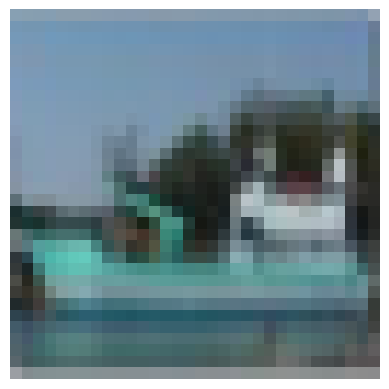

ship


In [4]:
# visualise example

index = 111

exemplary_image = X_train[index]
exemplary_label = y_train[index]

plt.imshow(exemplary_image)
plt.axis('off')
plt.show()

print(label_dict[exemplary_label[0]])

In [5]:
#normalizing the pixel values

X_train=X_train/255
X_test=X_test/255

In [6]:
#defining model
model=Sequential()

#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))

#adding pooling layer
model.add(MaxPool2D(3,3))

#second convolution layer
model.add(Conv2D(32,(3,3),activation='relu'))

#second pooling layer
model.add(MaxPool2D(2,2))

#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='tanh'))

#adding output layer
model.add(Dense(10,activation='softmax'))

#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting the model
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4931 - accuracy: 0.4646
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1448 - accuracy: 0.5925
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0273 - accuracy: 0.6403
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9505 - accuracy: 0.6672
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8926 - accuracy: 0.6863
Epoch 6/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8272 - accuracy: 0.7105
Epoch 7/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7800 - accuracy: 0.7251
Epoch 8/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7412 - accuracy: 0.7421
Epoch 9/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6986 - accuracy: 0.7567
Epoch 10/20
1563/1563 [==============================] - 15s 10ms/ste

In [7]:
#evaluting the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9473 - accuracy: 0.7094


[0.9473288059234619, 0.7093999981880188]